# Linear Regression Assignment

## BoomBikes

## Step 1 : Reading the Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
bikes_df = pd.read_csv("day.csv")

# Reindexing the dataframe

bikes_df = bikes_df.set_index("instant")


In [3]:
bikes_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Shape of the dataset
bikes_df.shape

(730, 15)

In [5]:
# Info of the dataset
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


All the values in the dataset seems to be non-null 

In [6]:
# Percentage of notnull values in each column
percent_non_null = (bikes_df.notnull().mean() * 100).round(2)
print(percent_non_null)

dteday        100.0
season        100.0
yr            100.0
mnth          100.0
holiday       100.0
weekday       100.0
workingday    100.0
weathersit    100.0
temp          100.0
atemp         100.0
hum           100.0
windspeed     100.0
casual        100.0
registered    100.0
cnt           100.0
dtype: float64


In [7]:
# Descriptive statistics of the dataset
bikes_df.describe()



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning


In [8]:
bikes_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [9]:
bikes_df[["temp","atemp"]].head()

,temp,atemp
instant,,
1,14.110847,18.18125
2,14.902598,17.68695
3,8.050924,9.47025
4,8.200000,10.60610
5,9.305237,11.46350


both temp and atemp have same values, so we need to check if they have same distribution




Text(0, 0.5, 'Frequency')

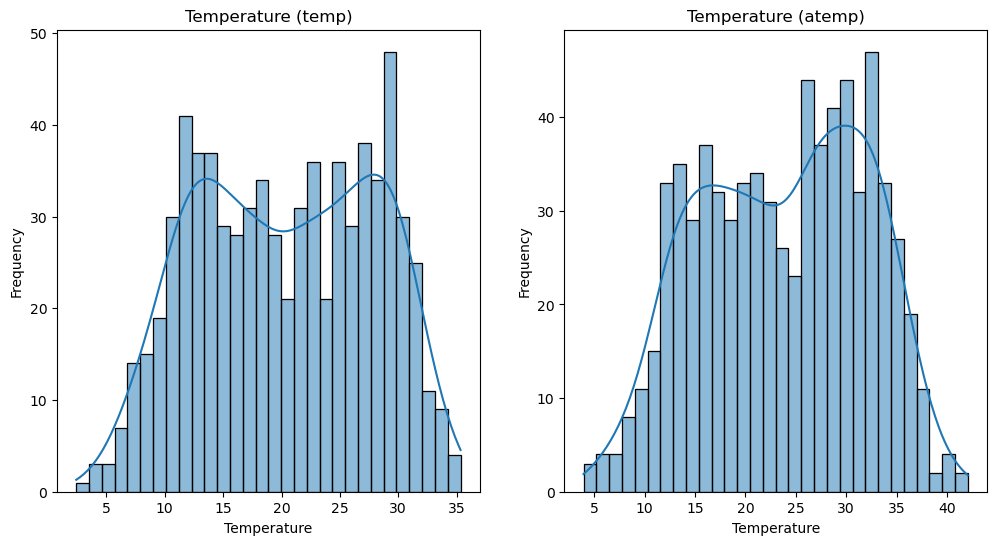

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(bikes_df['temp'], bins=30, kde=True)
plt.title('Temperature (temp)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(bikes_df['atemp'], bins=30, kde=True)
plt.title('Temperature (atemp)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')



In [11]:
# Finding the correlation between temp and atemp
bikes_df[["temp","atemp"]].corr()



,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


It makes sense that temp and atemp are highly correlated, as they both measure temperature.


In [12]:
# Dropping atemp
bikes_df.drop(columns=["atemp"], inplace=True)

In [13]:
bikes_df[["casual","registered", "cnt"]].head()



,casual,registered,cnt
instant,,,
1,331,654,985
2,131,670,801
3,120,1229,1349
4,108,1454,1562
5,82,1518,1600


In [14]:
# Since the sum of casual and registered is equal to cnt, we can drop casual and registered
bikes_df.drop(columns=["casual","registered"], inplace=True)


In [15]:
bikes_df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600
6,06-01-2018,1,0,1,0,6,0,1,8.378268,51.8261,6.000868,1606
7,07-01-2018,1,0,1,0,0,0,2,8.057402,49.8696,11.304642,1510
8,08-01-2018,1,0,1,0,1,1,2,6.765000,53.5833,17.875868,959
9,09-01-2018,1,0,1,0,2,1,1,5.671653,43.4167,24.250650,822


In [16]:
# Extract the day out from dteday
bikes_df["day"] = pd.to_datetime(bikes_df["dteday"], format="%d-%m-%Y").dt.day
bikes_df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,1
2,02-01-2018,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,2
3,03-01-2018,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,3
4,04-01-2018,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,4
5,05-01-2018,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,5
6,06-01-2018,1,0,1,0,6,0,1,8.378268,51.8261,6.000868,1606,6
7,07-01-2018,1,0,1,0,0,0,2,8.057402,49.8696,11.304642,1510,7
8,08-01-2018,1,0,1,0,1,1,2,6.765000,53.5833,17.875868,959,8
9,09-01-2018,1,0,1,0,2,1,1,5.671653,43.4167,24.250650,822,9


In [17]:
# Dropping dteday as now the day, month and year are already present
bikes_df.drop(columns=["dteday"], inplace=True)
bikes_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
instant,,,,,,,,,,,,
1,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,1
2,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,2
3,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,3
4,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,4
5,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,5
6,1,0,1,0,6,0,1,8.378268,51.8261,6.000868,1606,6
7,1,0,1,0,0,0,2,8.057402,49.8696,11.304642,1510,7
8,1,0,1,0,1,1,2,6.765000,53.5833,17.875868,959,8
9,1,0,1,0,2,1,1,5.671653,43.4167,24.250650,822,9


In [18]:
# Converting the season to its string type
# season (1:spring, 2:summer, 3:fall, 4:winter)
bikes_df["season"] = bikes_df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bikes_df["season"].value_counts()


season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [19]:
# Similarly converting mnth to its string type
# mnth (1:January, 2:February, 3:March, 4:April, 5:May, 6:June, 7:July, 8:August, 9:September, 10:October, 11:November, 12:December)
bikes_df["mnth"] = bikes_df["mnth"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})
bikes_df["mnth"].value_counts()


mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

In [20]:
# Similarly for weekday
# weekday (0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat)
bikes_df["weekday"] = bikes_df["weekday"].map({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"})
bikes_df["weekday"].value_counts()



weekday
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: count, dtype: int64

In [21]:
# Similarly for weathersit
# weathersit (1:Clear, 2:Mist, 3:Light Snow, 4:Heavy Rain)
bikes_df["weathersit"] = bikes_df["weathersit"].map({1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Heavy Rain"})
bikes_df["weathersit"].value_counts()


weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64

In [22]:
# Value counts for yr
print(bikes_df["yr"].value_counts())
print("-"*100)
# Value counts for workingday
print(bikes_df["workingday"].value_counts())
print("-"*100)
# Value counts for holiday
print(bikes_df["holiday"].value_counts())
print("-"*100)



yr
0    365
1    365
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
workingday
1    504
0    226
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
holiday
0    709
1     21
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


## Step 2 : Visualizing the data


In [23]:
# Checking the columns once again
bikes_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')

In [24]:
# Creating new datafram with numerical variables
num_df = bikes_df[["temp", "hum", "windspeed", "cnt"]]
num_df.head(10) 

,temp,hum,windspeed,cnt
instant,,,,
1,14.110847,80.5833,10.749882,985
2,14.902598,69.6087,16.652113,801
3,8.050924,43.7273,16.636703,1349
4,8.200000,59.0435,10.739832,1562
5,9.305237,43.6957,12.522300,1600
6,8.378268,51.8261,6.000868,1606
7,8.057402,49.8696,11.304642,1510
8,6.765000,53.5833,17.875868,959
9,5.671653,43.4167,24.250650,822


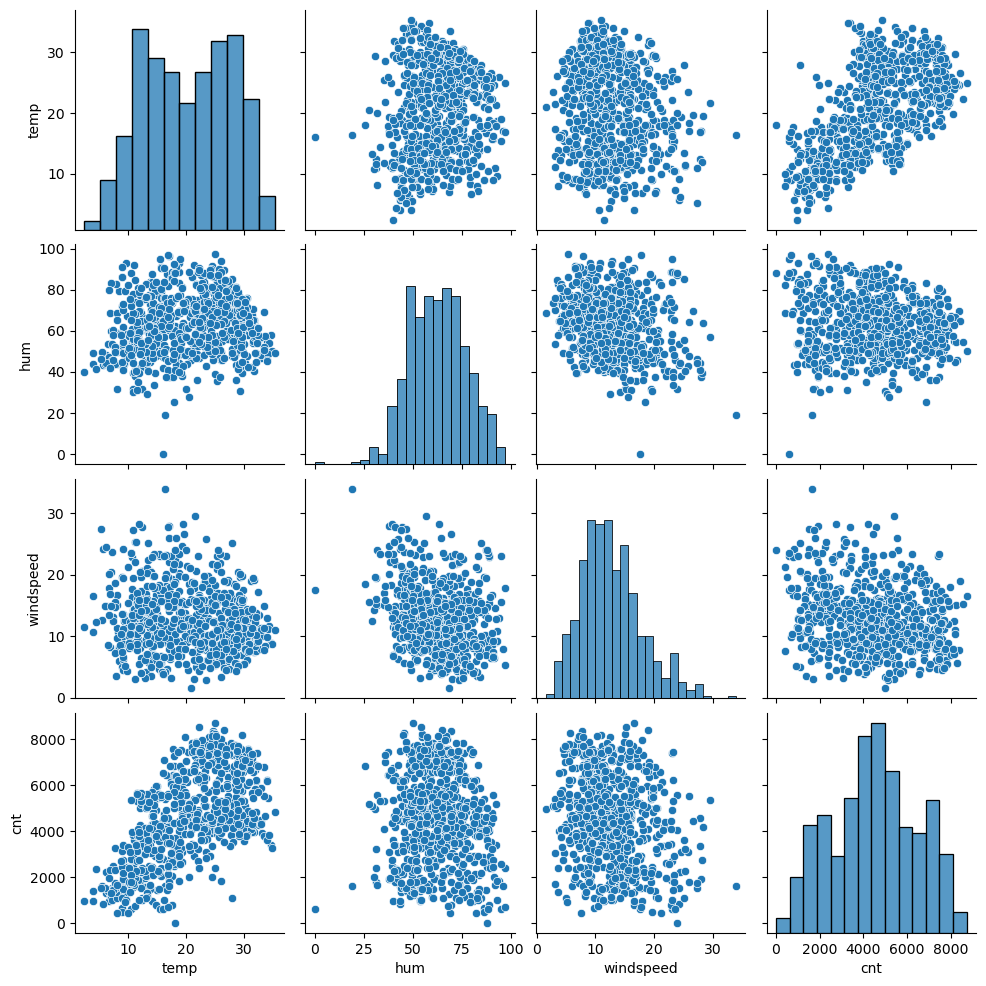

In [25]:
# Pairplot for the numerical data
sns.pairplot(num_df)


- There seems to be a correlation between "temp" and "cnt"
- "hum" and "windspeed" also seems to have some collinearity
- similarily we can see correlation between "temp" and "hum"

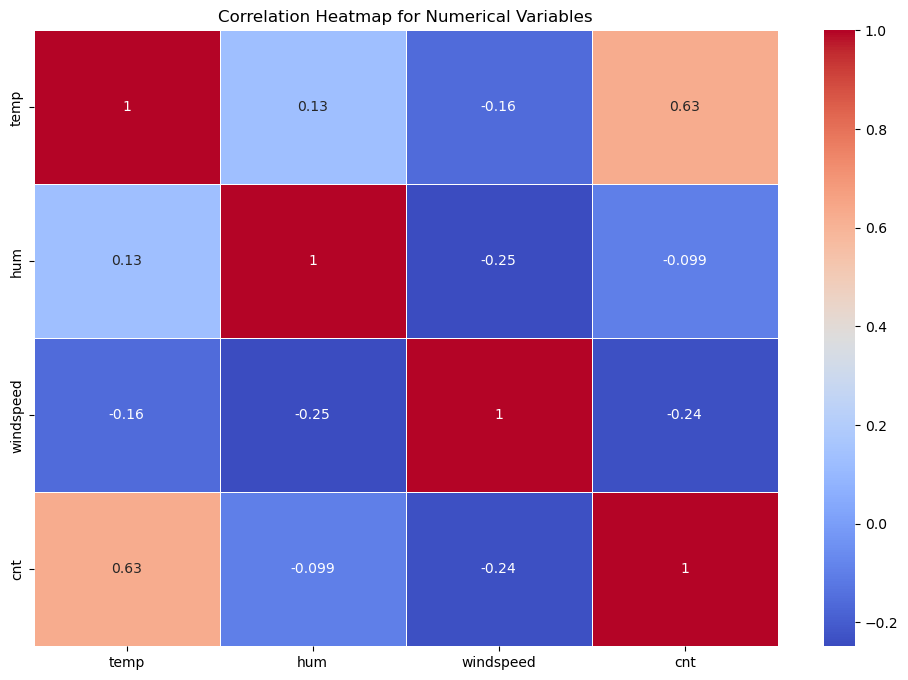

In [26]:
# Heatmap for Numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()



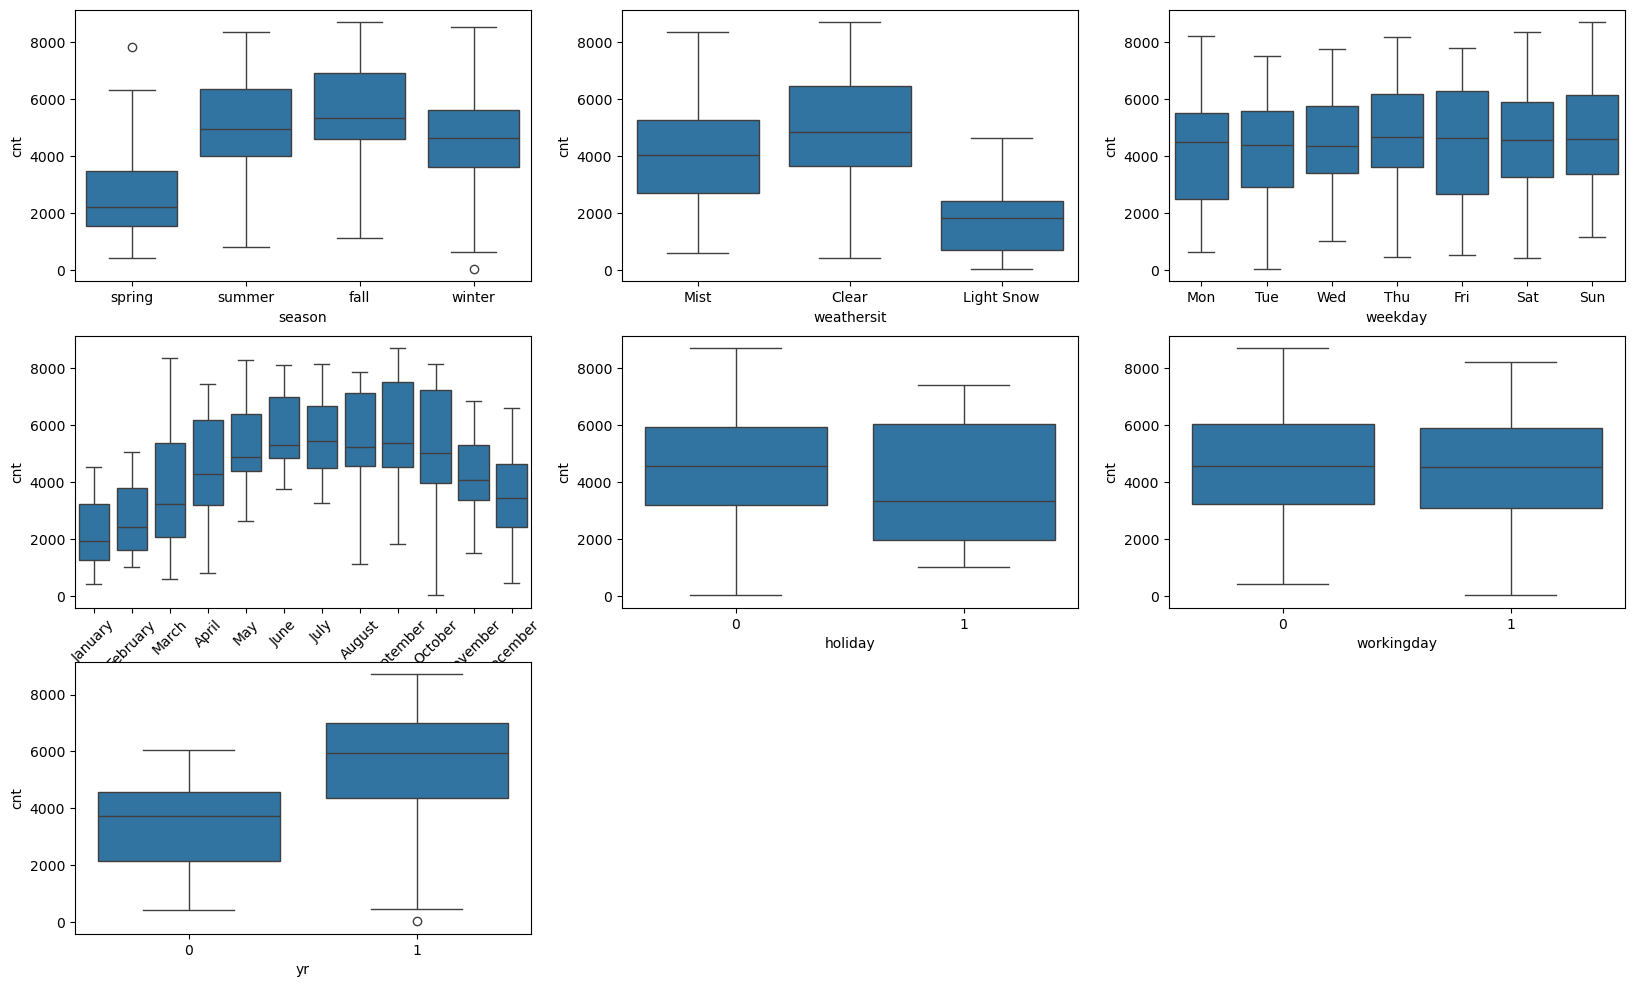

In [27]:
# Plotting boxplots for categorical variables.
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikes_df)
plt.subplot(3,3,2)
sns.boxplot(x='weathersit', y='cnt', data=bikes_df)
plt.subplot(3,3,3)
sns.boxplot(x='weekday', y='cnt', data=bikes_df)
plt.subplot(3,3,4)
sns.boxplot(x='mnth', y='cnt', data=bikes_df)
plt.xticks(rotation=45)
plt.subplot(3,3,5)
sns.boxplot(x='holiday', y='cnt', data=bikes_df)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bikes_df)
plt.subplot(3,3,7)
sns.boxplot(x='yr', y='cnt', data=bikes_df)
plt.show()

- **Season:** Fall is the busiest season for bike rentals, while spring is the slowest. Summer and winter have moderate rental numbers.
- **Weather:** Clear weather brings the most rentals, while light snow brings the fewest.
- **Weekday:** All weekdays have similar rental numbers.
- **Month:** June, July, August, and September are the busiest months, while January and February are the slowest.
- **Holiday:** Non-holiday days have more rentals than holidays.
- **Working Day:** Working days and non-working days have similar rental numbers.
- **Year:** Rentals were significantly higher in 2019 compared to 2018.

## Step 3: Data Preparation 


In [28]:
# Creating a dataframe containing variables for which dummy variables needs to be created.
CategoricalVars = bikes_df[['season', 'mnth', 'weathersit', 'weekday']]
CategoricalVars.head()

,season,mnth,weathersit,weekday
instant,,,,
1,spring,January,Mist,Mon
2,spring,January,Mist,Tue
3,spring,January,Clear,Wed
4,spring,January,Clear,Thu
5,spring,January,Clear,Fri


In [30]:
# Creating dummy variables
bike_dummies_df = pd.get_dummies(CategoricalVars, drop_first=True).astype(int)
bike_dummies_df.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weathersit_Light Snow,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Dropping the categorical variables from the original dataframe and re-adding the dummy variables
columns_to_drop = CategoricalVars.columns.tolist()
bikes_df = bikes_df.drop(columns_to_drop, axis=1)  # {{ edit_1 }}
bikes_df = pd.concat([bikes_df, bike_dummies_df], axis=1)
bikes_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,season_summer,...,mnth_October,mnth_September,weathersit_Light Snow,weathersit_Mist,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,14.110847,80.5833,10.749882,985,1,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,14.902598,69.6087,16.652113,801,2,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,8.050924,43.7273,16.636703,1349,3,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,8.200000,59.0435,10.739832,1562,4,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,9.305237,43.6957,12.522300,1600,5,1,0,...,0,0,0,0,0,0,0,0,0,0


## Step4: Splitting the Data into Training and Testing Sets